In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## <a class="anchor" id="1"></a> Градиентный спуск 2

Реализовать градиентный спуск в Python для задачи регрессии для одного фактора.

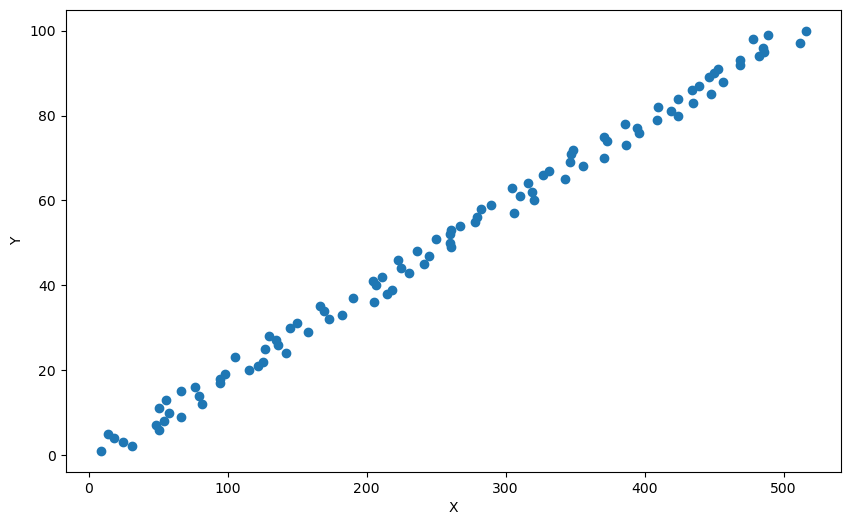

In [2]:
# исходные данные
X = np.arange(1, 101)
Y = 5 * X + 7 + np.random.uniform(-20, 20, size=100) 

plt.figure(figsize=(10, 6))
plt.scatter(Y, X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# функция потерь
def loss_function(X, Y, w, b):
    return np.mean(np.power((w*X + b - Y), 2)) / 2

w_sample = 0
b_sample = 0
loss_function_sample = loss_function(X, Y, w_sample, b_sample)
loss_function_sample

43924.49191407878

In [4]:
# частные производные
def grad_w(X, Y, w, b):
    return np.mean( (w * X + b - Y) * X )

def grad_b(X, Y, w, b):
    return np.mean(w * X - b - Y)

grad_w(X, Y, w_sample, b_sample), grad_b(X, Y, w_sample, b_sample)

(-17228.686443574108, -258.6648931215192)

In [5]:
# градиентный спуск
w = 0
b = 0
lambda_ = 0.0001
i = 0
max_iters = 10_000

while i <= max_iters:
    w_new = w - lambda_ * grad_w(X, Y, w, b)
    b_new = b - lambda_ * grad_b(X, Y, w, b)
    
    if np.power((b_new - b)**2 + (w_new - w)**2, 0.5) <= 0.001:
        break

    w = w_new
    b = b_new
    i += 1

w, b, i

(5.088813505797163, 0.07905972108679593, 19)

In [6]:
df = pd.DataFrame({'X': X, 'Y': Y})

model = LinearRegression()
model.fit(df[['X']], df['Y'])
analytical_w = model.coef_[0]
analytical_b = model.intercept_

analytical_w, analytical_b

(4.999831192244088, 6.173417913192765)

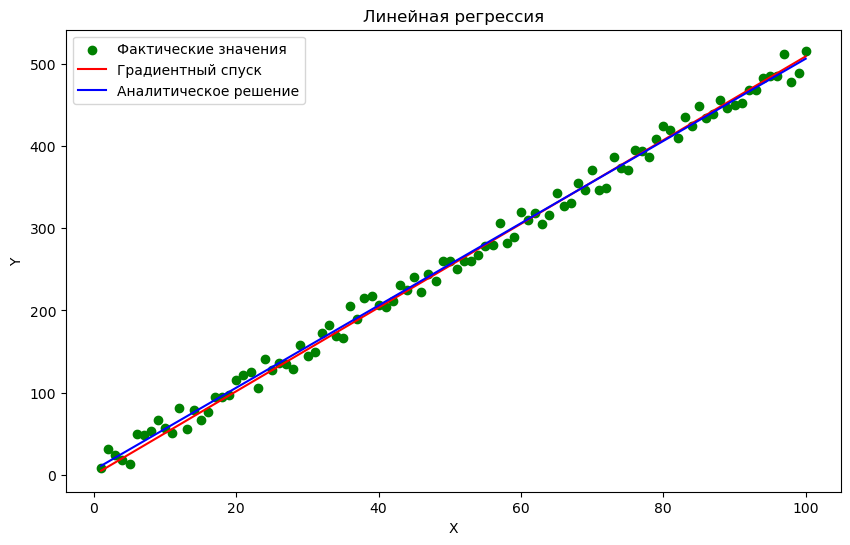

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], color='green', label='Фактические значения')
plt.plot(df['X'], w * df['X'] + b, color='red', label='Градиентный спуск')
plt.plot(df['X'], analytical_w * df['X'] + analytical_b, color='blue', label='Аналитическое решение')
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()